## Set-up

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/CIS5810/LCS/HW2

In [4]:
import numpy as np
from PIL import Image
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

## Orientation & Image axis

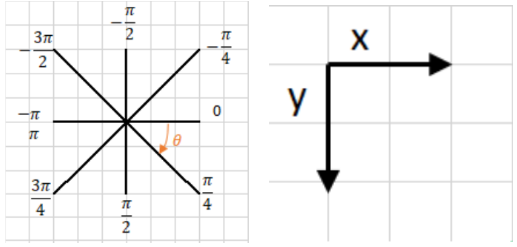

### Example 1: Slice and Paint image

Read in image with `Image` module from Pillow library with different [mode](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes).

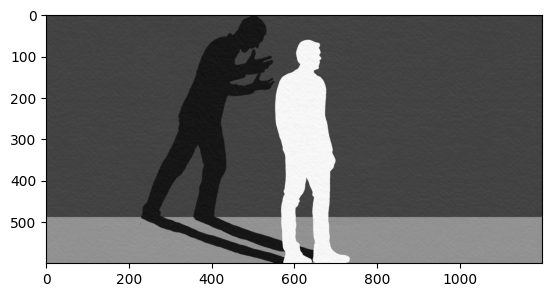

In [5]:
img = np.array(Image.open('shadow.png').convert("L"))
plt.imshow(img, cmap='gray')

In [6]:
img.shape

(600, 1200)

In [7]:
img

array([[ 94,  91,  90, ...,  89,  90,  89],
       [ 94,  94,  92, ...,  87,  91,  93],
       [ 92,  93,  94, ...,  87,  89,  92],
       ...,
       [158, 159, 158, ..., 161, 160, 159],
       [159, 158, 160, ..., 159, 157, 159],
       [159, 160, 158, ..., 159, 159, 159]], dtype=uint8)

**Image slicing**

Assume `I` is the given image, we can get specfic region of `I` through [slicing](https://numpy.org/doc/stable/user/basics.indexing.html#slicing-and-striding) by giving start and end index along each direction

`I_crop = I[y_start:y_end, x_start:x_end]`

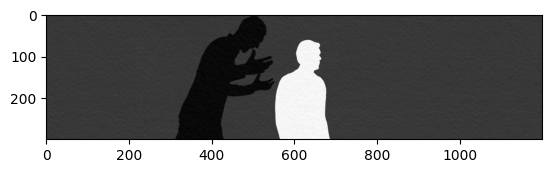

In [8]:
############ Crop images with NumPy array Slicing ############
upper_half_img = img[:300,:]
plt.imshow(upper_half_img, cmap='gray')

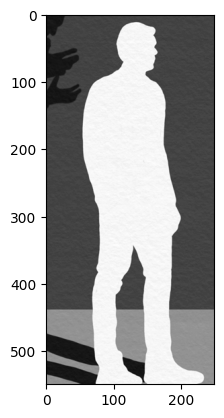

In [9]:
############ Crop out white region of person ############
y_start = 50
y_end = 600
x_start = 500
x_end = 750
img_crop = img[y_start:y_end, x_start:x_end]
plt.imshow(img_crop, cmap='gray')

**Image painting**

With the slicing operation, we can also paint `I` by modifying the pixel values

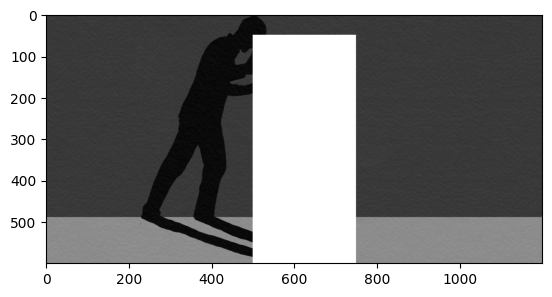

In [10]:
img_paint = img.copy()
img_paint[y_start:y_end, x_start:x_end] = 255
plt.imshow(img_paint, cmap='gray')

### Example 2: Slicing with RGB Images (3 channels)

When image is read in as RGB format, there would be three channels in the NumPy array with index order `[row, col, ch]`.

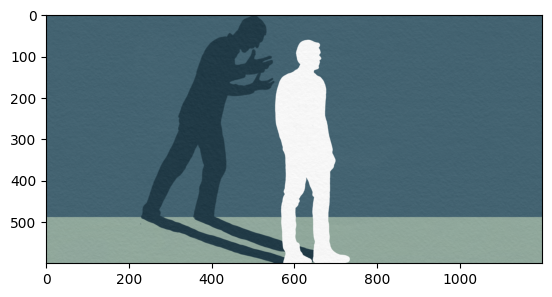

In [11]:
img = np.array(Image.open('shadow.png').convert("RGB"))
plt.imshow(img)

In [12]:
img.shape

(600, 1200, 3)

In [13]:
img

array([[[ 70, 102, 116],
        [ 67,  99, 113],
        [ 66,  98, 112],
        ...,
        [ 65,  97, 111],
        [ 66,  98, 112],
        [ 66,  97, 111]],

       [[ 70, 102, 116],
        [ 70, 102, 116],
        [ 68, 100, 114],
        ...,
        [ 64,  94, 109],
        [ 67,  99, 113],
        [ 69, 101, 115]],

       [[ 68, 100, 114],
        [ 69, 101, 115],
        [ 70, 102, 116],
        ...,
        [ 63,  95, 109],
        [ 65,  97, 111],
        [ 68, 100, 114]],

       ...,

       [[143, 167, 155],
        [144, 167, 155],
        [143, 166, 154],
        ...,
        [146, 169, 157],
        [145, 169, 157],
        [144, 167, 155]],

       [[144, 167, 155],
        [143, 167, 155],
        [145, 168, 157],
        ...,
        [144, 167, 155],
        [142, 166, 154],
        [144, 167, 155]],

       [[144, 168, 156],
        [145, 168, 156],
        [143, 167, 155],
        ...,
        [144, 167, 155],
        [144, 168, 156],
        [144, 167, 155]]

**Image Slicing**

Similarly, we can slice 3-channels image by specifying the start and end index of `y`, `x` and `channel`.

`[y_start:y_end, x_start:x_end, ch_start:ch_end]`

In [14]:
y_start = 50
y_end = 600
x_start = 500
x_end = 750
img_crop = img[y_start:y_end, x_start:x_end, :]

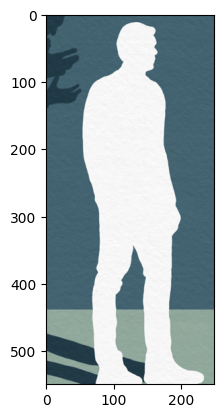

In [15]:
plt.imshow(img_crop)

**Image Painting**

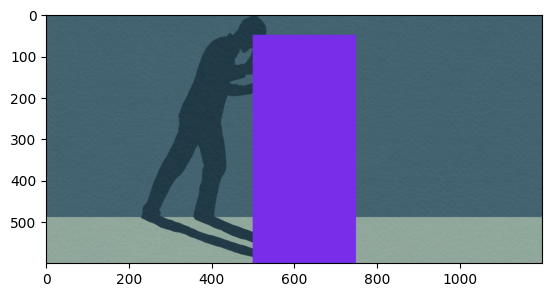

In [16]:
img_paint = img.copy()
img_paint[y_start:y_end, x_start:x_end, :] = np.array([120,45,233])
plt.imshow(img_paint)

## Convolution with SciPy
There are many convenient libraries with functions to perform convolution. In here we present the convolution function from SciPy library with documentation in [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html). You may find a lot of useful details from the official documentation page.

### Example 3: Convolution with Gaussian Kernel

Since we have already imported the `convolve2d` function, we can directly call it to use it s.t.

`I_conv = convolved2d(I, kernel)`

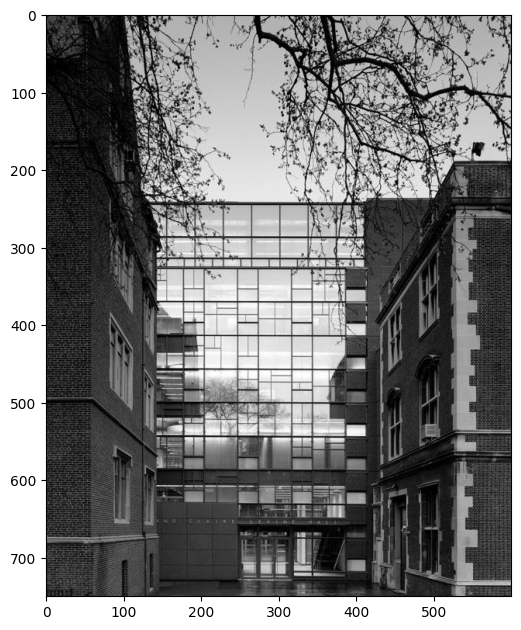

In [17]:
img = np.array(Image.open('levine.jpg').convert("L"))
plt.figure(figsize=(6,8))
plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Convolved with Gaussian Kernel')

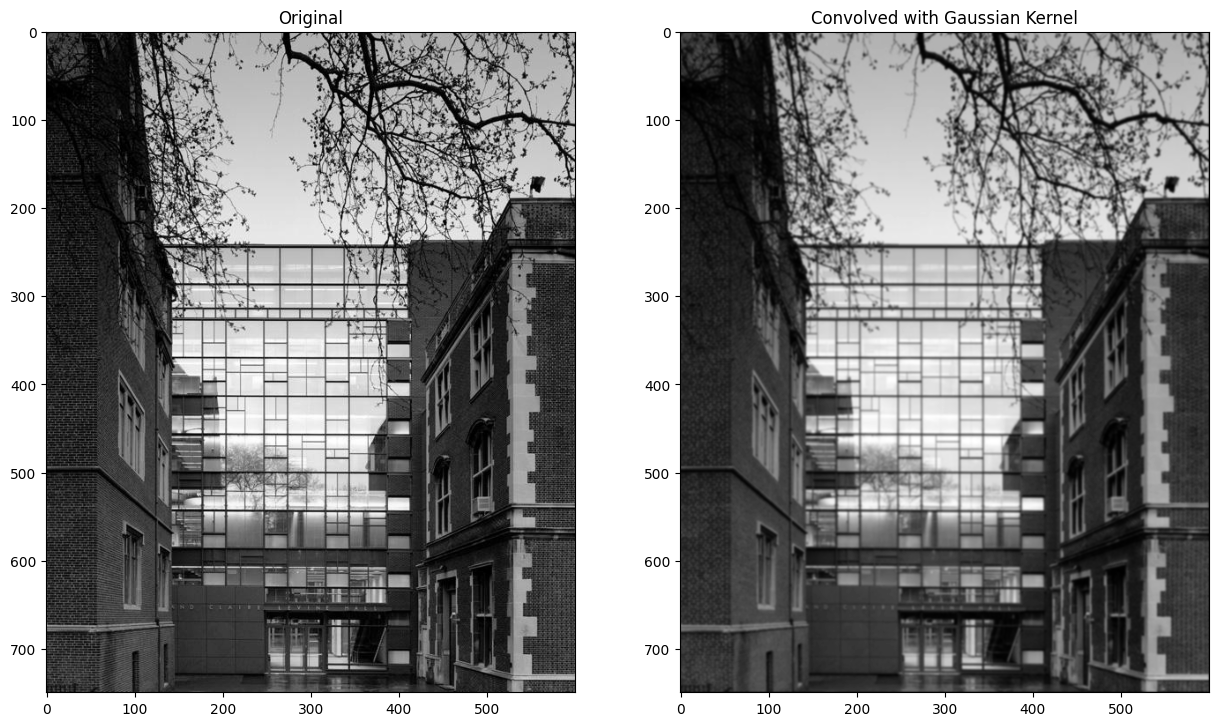

In [18]:
# Gaussian kernel
kernel = np.array([[1,4,6,4,1],
                   [4,16,24,16,4],
                   [6,24,36,24,6],
                   [4,16,24,16,4],
                   [1,4,6,4,1]]) / 256
# Convolve image with Gaussian kernel
img_conv = convolve2d(img, kernel, mode='same')
# Display original image and convolved image
fig, ax = plt.subplots(1,2,figsize=(15,20))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_conv, cmap='gray')
ax[1].set_title('Convolved with Gaussian Kernel')

## Canny Edge Detection - Generate Image gradient

"The direction of edge is perpendicular to the gradient direction"

In [19]:
# Read in original image in grayscale
img = np.array(Image.open('levine.jpg').convert("L"))
# Specify dx and dy kernel
dx = np.array([[-1,0,1],
               [-2,0,2],
               [-1,0,1]])

dy = np.array([[1,2,1],
               [0,0,0],
               [-1,-2,-1]])

Ix = convolve2d(img, dx, mode='same')
Iy = convolve2d(img, dy, mode='same')

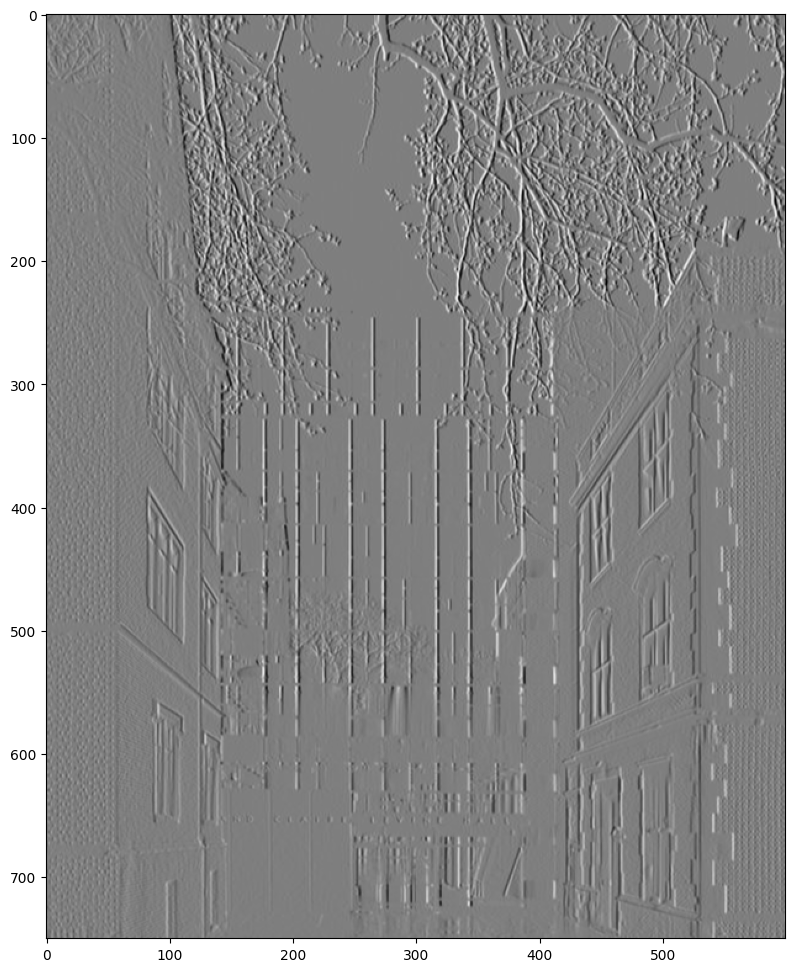

In [20]:
plt.figure(figsize=(12,12))
plt.imshow(Ix, cmap='gray')

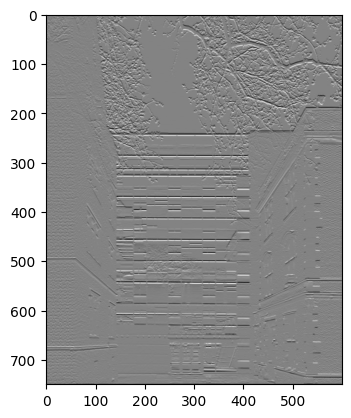

In [21]:
plt.imshow(Iy, cmap='gray')

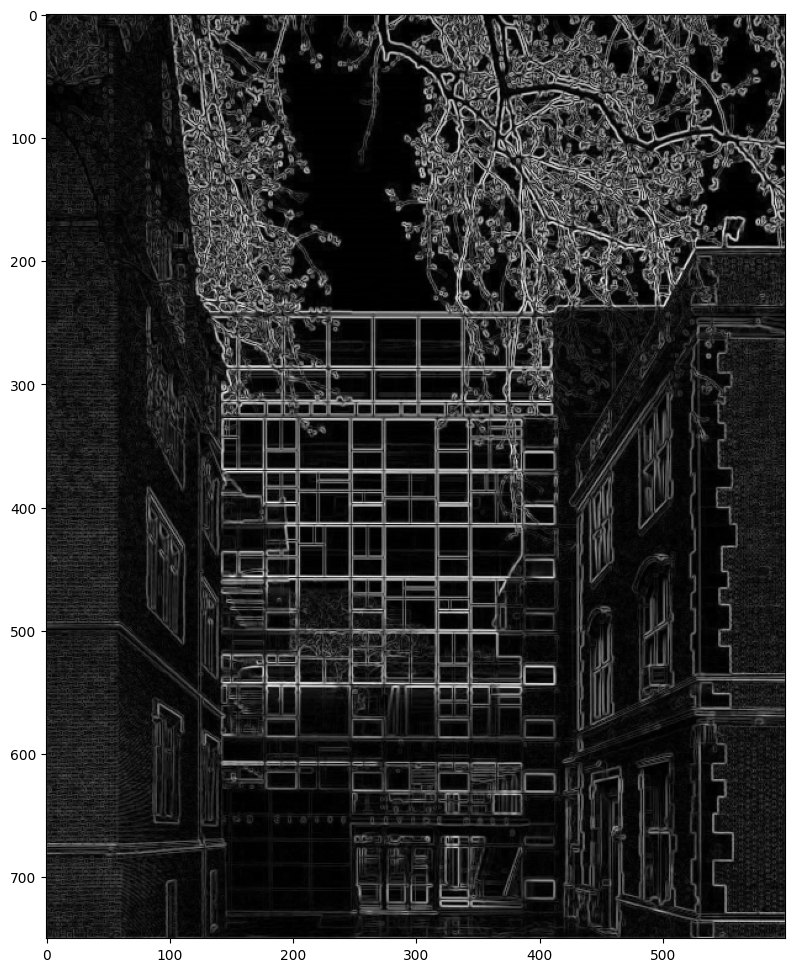

In [22]:
Mag = np.sqrt(Ix**2 + Iy**2)
plt.figure(figsize=(12,12))
plt.imshow(Mag, cmap='gray')

## Vectorization

*Try to avoid `for-loop` as much as possible!*

### Example 4: Suppressing image pixels with vectorization

Assume we want to suppress all pixels less than 10 as 0 in the canvas, there is mainly two ways:

1. With `for-loop` (Bad): Iterate each pixel and assign to 0 if less than 10
2. Without `for-loop` (Good): Assign all pixels less than 10 to 0 in parallel

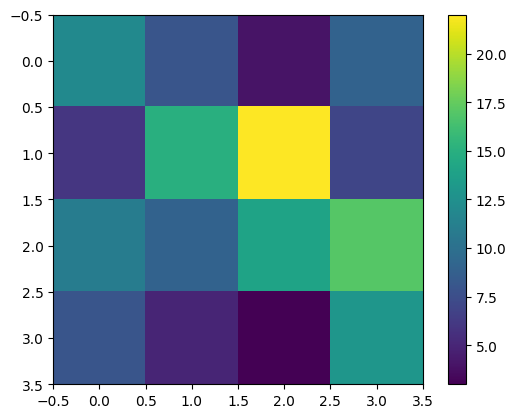

In [23]:
canvas = np.array([[12,8,4,9],
                   [6,15,22,7],
                   [11,9,14,17],
                   [8,5,3,13]])

# Visualize canvas as image
plt.imshow(canvas)
plt.colorbar()

In [24]:
%%timeit
# Method 1: for-loop
new_canvas_for_loop = canvas.copy()
for i in range(new_canvas_for_loop.shape[0]):
    for j in range(new_canvas_for_loop.shape[1]):
        if new_canvas_for_loop[i,j] < 10:
            new_canvas_for_loop[i,j] = 0

9.25 µs ± 778 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [25]:
%%timeit
# Method 2: Without for-loop
new_canvas_no_for_loop = canvas.copy()
invalid_index = new_canvas_no_for_loop < 10
new_canvas_no_for_loop[invalid_index] = 0

3.61 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


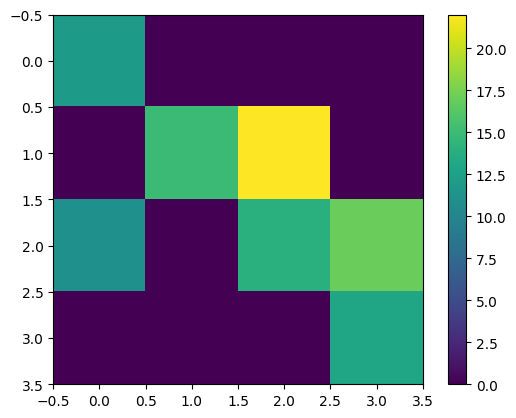

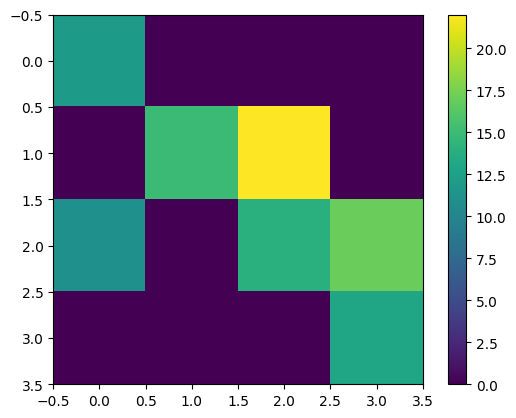

In [28]:
# Visualization
# With for-loop
new_canvas_for_loop = canvas.copy()
for i in range(new_canvas_for_loop.shape[0]):
    for j in range(new_canvas_for_loop.shape[1]):
        if new_canvas_for_loop[i,j] < 10:
            new_canvas_for_loop[i,j] = 0
plt.figure()
plt.imshow(new_canvas_for_loop)
plt.colorbar()

# Without for-loop
new_canvas_no_for_loop = canvas.copy()
invalid_index = new_canvas_no_for_loop < 10
new_canvas_no_for_loop[invalid_index] = 0
plt.figure()
plt.imshow(new_canvas_no_for_loop)
plt.colorbar()

## Useful Links


*   [Python Basics](https://colab.research.google.com/github/ffund/ml-notebooks/blob/master/notebooks/1-python-numpy-tutorial.ipynb)

*   [Numpy Tutorial](https://github.com/ageron/handson-ml/blob/master/tools_numpy.ipynb)

*   [Image kernels explained visually](https://setosa.io/ev/image-kernels/)